This notebook is to analyze progenitors of systems that Javier is interested in/other doing simular 3D hydrodynamical simulations. I am going to deal with the following systems (by making separate bools):

- Case 1: Mass 1: COWD 0.55-0.7 M_sun, Mass 2: > ~ 0.4 M_sun HeWD [Moran-Frail 2024]
    - DD after merger
- Case 2: Mass 1: COWD 1.1 M_sun, Mass 2: 0.35 M_sun HeWD [Burmester 2023]
    - DD on the accretor
- Case 3: Mass 1: COWD 0.8 M_sun, 0.7 M_sun COWD [Pakmor 2021]
    - DD on the donor
- Case 4: Mass 1: COWD 0.9 M_sun, 0.7-0.9 COWD [Pakmor 2010-2011]
    - Violent merger

Let's first do our imports

In [1]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')

In [2]:
import sys
import os

# Add the subdir to sys.path
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')

# Now you can import the module
import useful_fncs 

Let's now get the rate information, as well as the DCO information about the systems we want

In [3]:
# reading in the HDF5 file
pathTorates_H5 = '/home/jovyan/home/rate_outputs/Rate_info_WD_DD.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [4]:
Data_rates.keys()

<KeysViewHDF5 ['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']>

In [5]:
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']
redshifts = rates_info['redshifts']

In [6]:
# reading in the HDF5 file
pathToweights_H5 = '/home/jovyan/home/edit_hdf5/WDWD/v02.46.01/COMPAS_Output_wWeights_COWD_DD.h5' #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5)

In [7]:
Data_weights.keys()

<KeysViewHDF5 ['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_Pulsar_Evolution', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Run_Details']>

In [8]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_data[key] = Data_weights["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [9]:
DCO_data

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
0,0,2.328412e+13,1.110223e-16,0,"b""b'4 '""","b""b'NA '""",31.911977,27.289501,0,0.000473,0,1,0.0,0.0,158,43.919694,14,14,4.347694,10.000000
1,0,3.974767e+19,5.431362e-02,0,"b""b'NA '""","b""b'NA '""",5.843895,5.255385,0,0.000179,0,1,0.0,0.0,326,453.863126,14,14,16.329921,10.000000
2,1,6.281330e+02,5.821410e-01,0,"b""b'2 '""","b""b'4-8 '""",9.648989,1.454633,1,0.001588,0,1,0.0,0.0,695,0.033701,14,13,14.260153,10.000000
3,1,5.402979e+03,9.111420e-01,0,"b""b'4 '""","b""b'5-8 '""",3.382412,1.470501,1,0.000260,0,1,0.0,0.0,858,0.114685,14,13,19.579543,10.000000
4,0,8.206604e+18,6.933256e-01,0,"b""b'NA '""","b""b'NA '""",10.933214,2.614135,0,0.001677,0,1,0.0,0.0,948,557.934571,14,14,31.652154,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21684,2,2.834655e+03,0.000000e+00,0,"b""b'5 '""","b""b'3 '""",0.770769,0.396774,1,0.013625,0,1,NaN,NaN,999761,1.610884,11,11,940.615944,0.254697
21685,1,6.537726e-03,0.000000e+00,1,"b""b'2-8 '""","b""b'3 '""",0.783044,1.002699,1,0.001370,0,1,NaN,NaN,999848,0.088370,11,7,118.537793,0.305238
21686,2,1.073100e+03,0.000000e+00,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,0,1,NaN,NaN,999871,1.558990,11,11,1787.995323,0.212650
21687,1,3.009383e+03,0.000000e+00,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,0,1,NaN,NaN,999912,1.954841,11,11,382.472452,0.160558


In [10]:
# we now want to specifically pick out the DCOs that have COWD 
dco_mask = rates_info['DCOmask'][()]
DCO_data_masked = DCO_data[dco_mask]
DCO_data_masked

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
463,1,64.106710,0.0,0,"b""b'8 '""","b""b'3 '""",0.483516,0.394784,1,0.000438,0,1,NaN,NaN,29,0.517110,11,11,1536.080151,7.360919
464,2,0.008269,0.0,1,"b""b'5 '""","b""b'3 '""",0.629323,0.227306,1,0.000261,0,1,NaN,NaN,79,0.050954,11,10,3502.246069,8.902695
465,2,0.049491,0.0,0,"b""b'5 '""","b""b'3 '""",0.568929,0.211294,1,0.002140,0,1,NaN,NaN,86,0.074546,11,10,8874.314167,7.842265
466,1,8321.641517,0.0,0,"b""b'3 '""","b""b'5 '""",0.320580,0.526926,1,0.002418,0,1,NaN,NaN,87,1.677890,10,11,4428.913115,10.000000
467,1,441.783850,0.0,0,"b""b'1-2 '""","b""b'5-8 '""",0.276373,0.679873,1,0.012405,0,1,NaN,NaN,97,0.852472,10,11,1390.603090,9.999991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21684,2,2834.654788,0.0,0,"b""b'5 '""","b""b'3 '""",0.770769,0.396774,1,0.013625,0,1,NaN,NaN,999761,1.610884,11,11,940.615944,0.254697
21685,1,0.006538,0.0,1,"b""b'2-8 '""","b""b'3 '""",0.783044,1.002699,1,0.001370,0,1,NaN,NaN,999848,0.088370,11,7,118.537793,0.305238
21686,2,1073.100464,0.0,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,0,1,NaN,NaN,999871,1.558990,11,11,1787.995323,0.212650
21687,1,3009.383390,0.0,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,0,1,NaN,NaN,999912,1.954841,11,11,382.472452,0.160558


Let's add the merger rate at each redshift for each of the systems to our table

In [11]:
rates = rates_info['merger_rate']

for i in range(rates_info['merger_rate'][0,:].shape[0]):

    DCO_data_masked['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]

/tmp/ipykernel_10153/2875622755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DCO_data_masked['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]
/tmp/ipykernel_10153/2875622755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DCO_data_masked['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]
/tmp/ipykernel_10153/2875622755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

Let's now make all of the bools relating to each progenitor system for the double detonation scenario

In [12]:
# the first bool will be of the general case where we have a COWD that is at least 0.9 solar masses
COWD_general_bool = np.logical_or(np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Mass(1)']>0.9),np.logical_and(DCO_data_masked['Stellar_Type(2)']==11,DCO_data_masked['Mass(2)']>0.9))

#next is the case 1 bool - M1: 0.55-0.7 COWD + > ~ 0.4 HeWD, dd after merger
case1_mass1_bool = np.logical_and(np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Mass(1)']>0.55),np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Mass(1)']<0.7))
case1_mass2_bool = np.logical_and(DCO_data_masked['Stellar_Type(2)']==10,DCO_data_masked['Mass(2)']>0.40)
case1_bool = case1_mass1_bool*case1_mass2_bool

# case 2 - M1: 1.1 COWD, M2: 0.35 HeWD, dd on the accretor 
case2_mass1_bool = np.logical_and(np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Mass(1)']>1.0),np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Mass(1)']<1.2))
case2_mass2_bool = np.logical_and(np.logical_and(DCO_data_masked['Stellar_Type(2)']==10,DCO_data_masked['Mass(2)']>0.34),np.logical_and(DCO_data_masked['Stellar_Type(2)']==10,DCO_data_masked['Mass(2)']<0.36))
case2_bool = case2_mass1_bool*case2_mass2_bool

# case 3 - M1: 0.8 COWD, M2: 0.7 HeCOWD, dd on the donor - read the paper more ind depth
# we can't do this case yet because i don't think COMPAS tracks hybrid white dwarfs

# case 4 - M1: 0.9 COWD, 0.7-0.9 COWD, Violent merger
case4_mass1_bool = np.logical_and(np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Mass(1)']>0.8),np.logical_and(DCO_data_masked['Stellar_Type(1)']==11,DCO_data_masked['Mass(1)']<1.0))
case4_mass2_bool = np.logical_and(np.logical_and(DCO_data_masked['Stellar_Type(2)']==11,DCO_data_masked['Mass(2)']>0.7),np.logical_and(DCO_data_masked['Stellar_Type(2)']==11,DCO_data_masked['Mass(2)']<0.9))
case4_bool = case4_mass1_bool*case4_mass2_bool

Let's now compute the total merger rate when considering all of the sustems at each redshift

In [13]:
print(rates_info['merger_rate'])

<HDF5 dataset "merger_rate": shape (19561, 80), type "<f8">


In [14]:
# better way to find the merger rate
test_merger_rate_general = np.sum(rates_info['merger_rate'][COWD_general_bool],axis=0)
print(np.shape(test_merger_rate_general)) #summed over all of the systems

(80,)


In [15]:
case_1_merger_rate = np.sum(rates_info['merger_rate'][case1_bool],axis=0) # a better way of computing the total merger rate 
print(case_1_merger_rate)
# DCO_data_masked['merger_rate']=rates_info['merger_rate'] # adding the merger rate to the general dco data table and then can later apply the bools

[ 4.4569954   5.16553997  6.01757743  6.9706334   8.01549051  9.16621491
 10.41195436 11.75579217 13.20622823 14.69828068 16.26157483 17.8443168
 19.39445316 20.83466356 22.03929364 22.92501017 23.32191235 23.12354286
 22.24382562 20.7080765  18.59674135 16.08000606 13.39805915 10.78612977
  8.37466796  6.2816937   4.55265233  3.18327461  2.13956517  1.37777333
  0.84089037  0.4834905   0.06610073  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


In [16]:
# let's compute the merger rate for all of the cases
case_2_merger_rate = np.sum(rates_info['merger_rate'][case2_bool],axis=0)

case_4_merger_rate = np.sum(rates_info['merger_rate'][case4_bool],axis=0)

In [17]:
### old way of computing merger rates
# # before getting these merger rates, we need to make the cuts for our cases because that will affect the total merger rate 
# COWD_GENERAL_DATA = DCO_data_masked[COWD_general_bool]
# CASE1_DATA = DCO_data_masked[case1_bool]
# CASE2_DATA = DCO_data_masked[case2_bool]
# CASE4_DATA = DCO_data_masked[case4_bool]


# #
# test_merger_rate_general = np.sum(rates_info['merger_rate'][COWD_general_bool],axis=0)

# ## general case of a 0.9 COWD + comapnion 
# total_merger_rate_COWD_general = []

# # looping through each collection of merger rates, try using just np.sum
# for s in range(rates_info['merger_rate'][0,:].shape[0]):

#     # selecting the mean merger rate for each reshift bin
#     tota_rate = np.sum(COWD_GENERAL_DATA[COWD_GENERAL_DATA.columns[20+s]])
#     total_merger_rate_COWD_general.append(tota_rate)

# ## case 1
# total_merger_rate_CASE1 = []

# # looping through each collection of merger rates
# for s in range(rates_info['merger_rate'][0,:].shape[0]):

#     # selecting the mean merger rate for each reshift bin
#     tota_rate = np.sum(CASE1_DATA[CASE1_DATA.columns[20+s]])
#     total_merger_rate_CASE1.append(tota_rate)

# ## case 2 
# total_merger_rate_CASE2 = []

# # looping through each collection of merger rates
# for s in range(rates_info['merger_rate'][0,:].shape[0]):

#     # selecting the mean merger rate for each reshift bin
#     tota_rate = np.sum(CASE2_DATA[CASE2_DATA.columns[20+s]])
#     total_merger_rate_CASE2.append(tota_rate)

# ## case 4
# total_merger_rate_CASE4 = []

# # looping through each collection of merger rates
# for s in range(rates_info['merger_rate'][0,:].shape[0]):

#     # selecting the mean merger rate for each reshift bin
#     tota_rate = np.sum(CASE4_DATA[CASE4_DATA.columns[20+s]])
#     total_merger_rate_CASE4.append(tota_rate)

Let's gather our observational data that we will want to plot our simulated data with to compare

In [18]:
# extracting the redshifts and rates from Briel et al
# units in the appendix should be in h^-3 y^-1 Gpc^-3 so we must convert below to get yr^-1 Gpc^-3
h_little = 0.6766

redshifts_briel = [
    0, 0.01, 0.03, (0.025+0.050)/2, 0.073, (0.05+0.15)/2, (0.075+0.125)/2, 0.11, 0.11, 0.13, 
    0.15, (0.125+0.175)/2, 0.16, (0.175+0.225)/2, 0.2, 0.25, (0.15+0.35)/2, (0.225+0.275)/2, 
    0.26, 0.3, (0.275+0.325)/2, 0.35, 0.35, 0.42, 0.44, 0.45, 0.45, (0.35+0.55)/2, 0.46, 0.47, 
    0.47, 0.55, 0.55, 0.55, 0.62, 0.65, (0.55+0.75)/2, 0.65, 0.74, 0.75, 0.75, 0.75, 0.8, 0.83, 0.85, 
    0.85, 0.94, 0.95, 0.95, 1.05, 1.1, 1.14, 1.21, 1.23, 1.25, 1.59, 1.61, 1.69, 1.75, 2.25
]

rates_briel = [
    0.77, 0.82, 0.82, 0.81, 0.71, 1.60, 0.76, 1.08, 0.72, 0.58, 0.93, 0.90, 0.41, 1.01, 0.58,
    1.05, 1.14, 1.06, 0.82, 0.99, 1.27, 0.99, 1.05, 1.34, 0.76, 0.90, 1.05, 1.52, 1.40, 1.22, 
    2.33, 0.93, 1.40, 1.52, 3.76, 1.40, 2.01, 1.43, 2.30, 1.49, 1.98, 1.69, 2.45, 3.79, 2.27, 
    1.66, 1.31, 2.22, 2.24, 2.30, 2.16, 2.06, 3.85, 2.45, 1.87, 1.31, 1.22, 2.97, 2.10, 1.43
]

# converting the rates to the correct units
rates_briel = np.array(rates_briel)
converted_rates_briel = (rates_briel*(10**5))*(h_little**3)

## uncertainties
lower_limits = [
    -0.10, -0.26, -0.32, -0.24, -0.08, -0.85, -0.13, -0.29, -0.20, -0.18, -0.67, -0.10, -0.26, -0.09, 
    -0.23, -0.76, -0.35, -0.08, -0.20, -0.44, -0.10, -0.55, -0.17, -0.93, -0.39, -0.44, -0.17, -0.38, 
    -0.50, -0.17, -0.79, -0.41, -0.17, -0.26, -1.66, -0.15, -0.52, -0.50, -1.20, -0.55, -0.61, -0.17, 
    -0.54, -0.79, -0.64, -0.15, -0.55, -0.73, -0.23, -0.82, -0.35, -0.53, -0.85, -0.82, -0.64, -0.64, 
    -0.67, -1.08, -0.87, -1.11
]

lower_limits = np.array(lower_limits)
converted_lower_limits = (lower_limits*(10**5)*(h_little**3))

upper_limits = [
    0.10, 0.26, 0.32, 0.33, 0.08, 1.46, 0.15, 0.29, 0.08, 0.20, 0.67, 0.11, 0.26, 0.09, 0.23,
    1.75, 0.38, 0.09, 0.20, 0.47, 0.11, 0.55, 0.17, 1.22, 0.67, 0.44, 0.17, 0.32, 0.50, 0.17, 
    1.08, 0.41, 0.17, 0.29, 2.57, 0.15, 0.55, 0.50, 0.96, 0.79, 0.61, 0.17, 0.67, 0.96, 0.64, 
    0.15, 0.64, 0.73, 0.23, 0.82, 0.35, 0.70, 1.05, 0.73, 0.90, 0.99, 1.14, 1.57, 1.31, 2.77
]

upper_limits = np.array(upper_limits)
converted_upper_limits = (upper_limits*(10**5)*(h_little**3))

# multiplied the lower errors by -1 so make them positive to avoid the plt.errorbar error 
y_error = [-1*(converted_lower_limits), converted_upper_limits]
# y_error = [converted_rates_briel+ converted_lower_limits, converted_rates_briel + converted_upper_limits]
# converted_y_error = y_error*(10**5)*(0.6766)

# error_bars = y_error


(1000, 1000000)

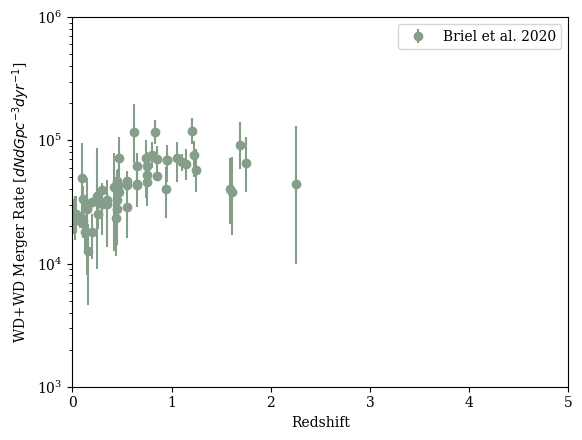

In [19]:
# testing to make sure the Briel et al. rates look good

## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = '#849E8A',label='Briel et al. 2020')

plt.yscale('log')
plt.ylabel(r"WD+WD Merger Rate [$dNdGpc^{-3}dyr^{-1}$]")
plt.xlabel(r"Redshift")
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()
plt.xlim(0,5)
plt.ylim(10**3,10**6)

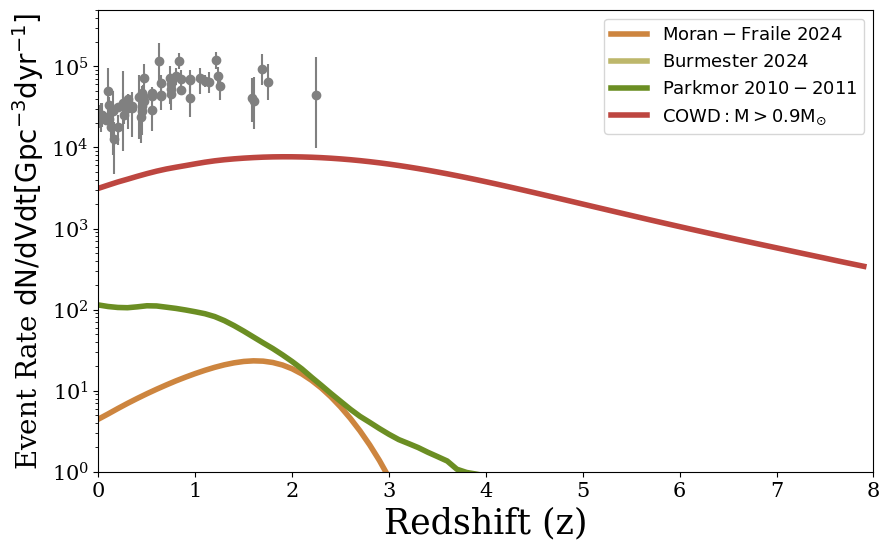

In [22]:
# let's do a similar plot to above but for mass cuts of just COWD and not M_tot

# let's plot the merger rates over redshift

plt.figure(figsize=(10,6))
## COMPAS model
#mass slices
plt.plot(redshifts[()],case_1_merger_rate,linewidth=4,color='peru',label=r'$\mathrm{Moran-Fraile}$ $\mathrm{2024}$')
plt.plot(redshifts[()],case_2_merger_rate,linewidth=4,color='darkkhaki',label=r'$\mathrm{Burmester}$ $\mathrm{2024}$')
plt.plot(redshifts[()],case_4_merger_rate,linewidth=4,color='olivedrab',label=r'$\mathrm{Parkmor}$ $\mathrm{2010-2011}$')

plt.plot(redshifts[()],test_merger_rate_general,linewidth=4,color='#BD4640',label=r'$\mathrm{COWD: M > 0.9 M_{\odot}}$')
## COMPAS model version v03.35.03
# total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
# redshifts_NS = rates_info_NS['redshifts']

# plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=2,color='black')#,label=r'NSNS Systems')#,label=r'$\mathrm{BNS}$')

## Briel et al. 2020
# plt.plot(redshifts_briel,converted_rates_briel,'.',color='lavender',label='Briel 2020')
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error,fmt='o', color = 'gray')#,label='Briel et al. 2022')

## LVK BNS rate
# plt.fill_between([0.1,0.3], 
#                 10,
#                 1700, 
#                 alpha=0.15, 
#                 color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')


# let's add a line to add important events that have happened
## peak of star formation?
# plt.axvline(3, color='#c7c9a9', linestyle='--', linewidth=2,label='Peak of Star Formation - TNG100')


## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Event Rate $\mathrm{dN/dVdt}$$\mathrm{[Gpc^{-3}dyr^{-1}}]$",fontsize=20)
plt.xlabel(r"Redshift (z)",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend(fontsize=13)

# save figure:
#plt.savefig("COWD_explosion_mechanism_redshift.png",bbox_inches='tight',pad_inches=0.1)


It looks like nothing is plotted for the Burmester case but this is because only 3 systems fall within the restrictions of this case

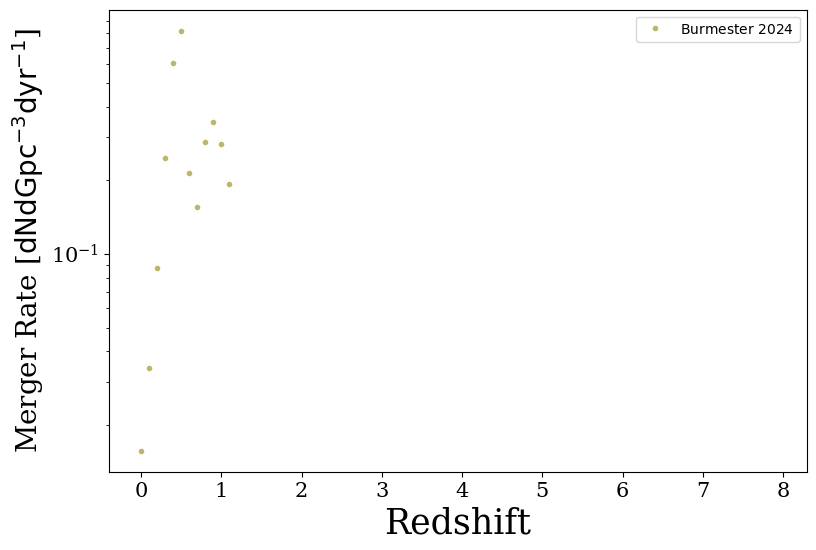

In [56]:
plt.figure(figsize=(9,6))
plt.plot(redshifts[()],total_merger_rate_CASE2,'.',linewidth=4,color='darkkhaki',label=r'$\mathrm{Burmester}$ $\mathrm{2024}$')
## axis
# plt.xlim(0,8)
# # plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()